<a href="https://colab.research.google.com/github/dhruv21csu155/AIML/blob/main/Clustering_Algos_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [84]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2,random_state=23)

In [85]:
X.shape

(1000, 2)

In [86]:
y.shape

(1000,)

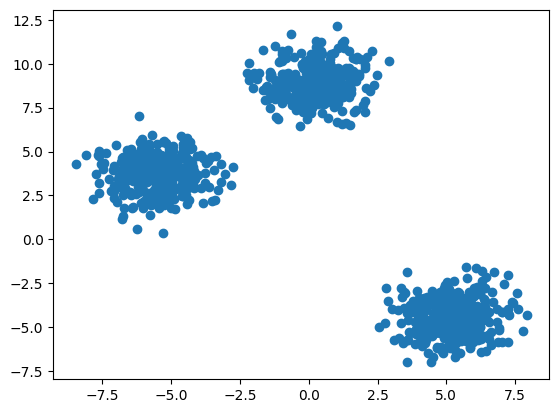

In [87]:
plt.scatter(X[:,0],X[:,1])

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size =0.33,random_state = 42)

In [89]:
from sklearn.cluster import KMeans

In [90]:
## Manual Process
## Elbow Method to select the k value

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [91]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 991.8899785187888,
 853.7350168356759,
 754.3765579043122,
 670.5867406403263,
 577.7036648444954,
 535.1788212470401]

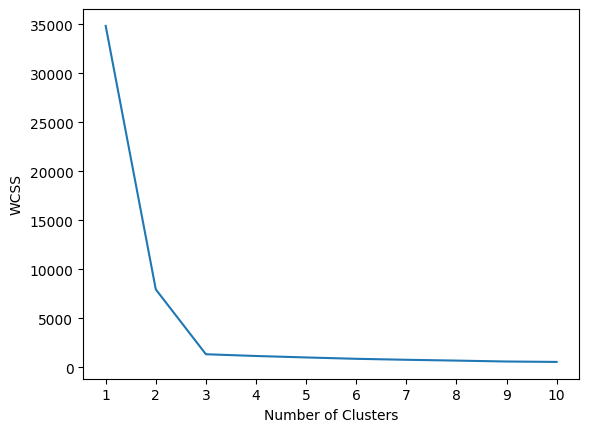

In [92]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [93]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')

In [94]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


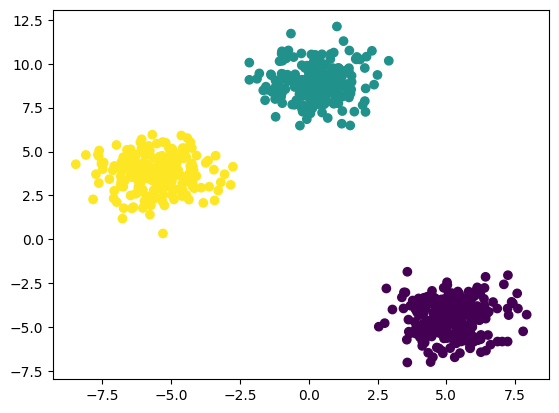

In [95]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

In [96]:
y_test_labels = kmeans.predict(X_test)

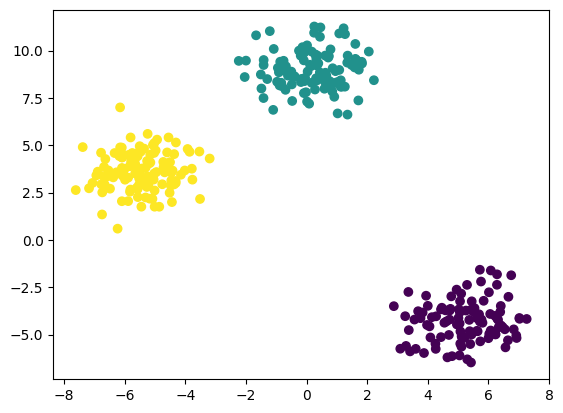

In [97]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_labels)

**Automating the above process of finding no. of clusters usinh KNEE - Locator**

In [98]:
## knee-locator
!pip install kneed

In [99]:
from kneed import KneeLocator

In [100]:
kl = KneeLocator(range(1,11), wcss, curve ='convex', direction = 'decreasing')
# NOTE : if wcss value decresing the "convex" and "Decresing" else "concave" and "Increasing"
kl.elbow

3

**Performance Metrics** -
**Silhoutte Score**

In [101]:
from sklearn.metrics import silhouette_score

In [108]:
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [109]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4895647834796006,
 0.3383975138989348,
 0.3307208733055341,
 0.34057434958469046,
 0.3393289278336161,
 0.3420320977253967]

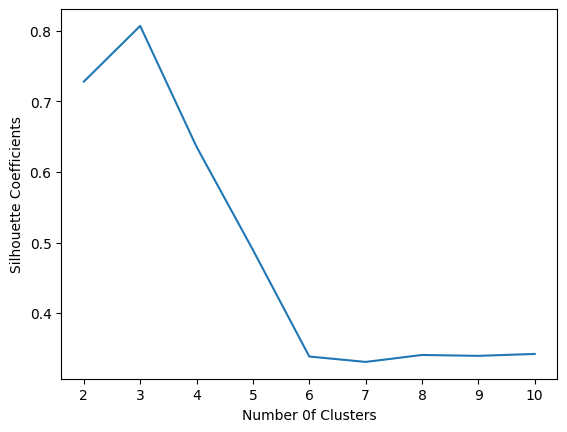

In [110]:
## plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number 0f Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

**HIERARCHIAL CLUSTERING**

In [112]:
from sklearn import datasets

In [113]:
iris = datasets.load_iris()

In [114]:
iris_data = pd.DataFrame(iris.data)

In [119]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [117]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [121]:
iris_data.columns = iris.feature_names

In [122]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
## Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
X_scaled = scaler.fit_transform(iris_data)

In [126]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [127]:
X_scaled.shape

(150, 4)